# Encontrar las raices de una función

Existen dos métodos: de bipartición y de Newton.

### Método de Bipartición

Toma como ptos iniciales a dos valores de de $x_0,x_1$ tales que:
$$
f(x_0)>0 \ \ \ \ \ \ \ f(x_1)<0
$$

Posteriormente se toma el punto medio entre $x_0,x_1$:
$$
x_2=\frac{x_0+x_1}{2}
$$

Se evalua $x_2$ en la función y se analiza si:
$$
f(x_2)>0 \ \ \ o \ \ \ \ f(x_2)<0
$$

Dependiendo del resultado, se elige como nuevo intervalo $[x_0,x_2]$ o $[x_2,x_1]$.

El paso se repite hasta que:

$$
|x_i-x_j|<\epsilon \ \ \ y \ \ \  |f(x_i)-f(x_j)|<\epsilon
$$

donde episilon es un número que el usuario eligió dependiendo de lo que necesita.

NOTA: éste algoritmo sólo sirve si la función cruza el eje, si son funciones pares como $x^2$, $x^4$, ... el algoritmo no funciona.

In [1]:
from pylab import*
%matplotlib inline

In [2]:
def biparticion(f,x_i,x_d,err=1e-5):
    raiz=0.5*(x_i+x_d)
    y_i,y_d=f(x_i),f(x_d)
    while abs(raiz-x_d) >=err and abs(y_i-y_d)>=err:
        y_m=f(raiz)
        if y_m == 0.:
            print "ya tenemos la raiz!"
            break
        if y_m*y_i < 0:
            x_d=raiz
        else:
            x_i=raiz
        raiz=0.5*(x_i+x_d)
        y_i,y_d=f(x_i),f(x_d)
    return raiz

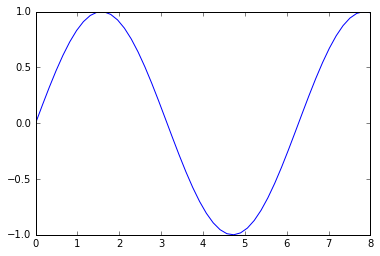

In [16]:
x=linspace(0,8)
plot(x,sin(x))
show()

In [4]:
print "La raiz es: ", biparticion(sin,5,7)
print "Notemos que el valor de 2pi es: ",2*pi
print "Así que el error es: ", 2*pi-biparticion(sin,5,7)

La raiz es:  6.28318023682
Notemos que el valor de 2pi es:  6.28318530718
Así que el error es:  5.07036317998e-06


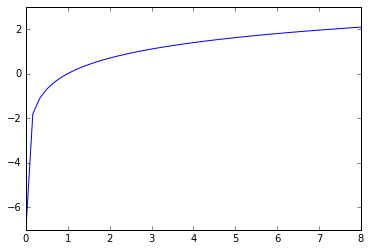

In [5]:
x=linspace(0.001,8)
plot(x,log(x))
show()

In [6]:
biparticion(log,0.001,8)

0.9999977293014525

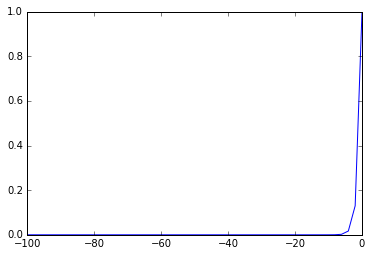

In [7]:
x=linspace(-100,0)
plot(x,exp(x))
show()

In [8]:
biparticion(exp(x),-10,0)
#como no hay x tal que exp(x)<0, el programa no puede dar un resultado :(

TypeError: 'numpy.ndarray' object is not callable

### Método de Newton

In [13]:
def mi_newton_1(func,d_func,x_ini,err=1e-8):
    n=0
    while abs(func(x_ini)) >= err:
        print n,"\t",x_ini
        raiz = x_ini - func(x_ini)/d_func(x_ini)
        x_ini = raiz
        n += 1
    return raiz

In [14]:
def una_funcion(x):
    return (x-1)**5

def d_una_funcion(x):
    return 5*(x-1)**4

In [15]:
print mi_newton_1(una_funcion,d_una_funcion,-20)

0 	-20
1 	-15
2 	-11
3 	-8
4 	-6
5 	-4
6 	-3
7 	-2
8 	-1
9 	0
1


In [17]:
print mi_newton_1(sin,cos,2)

0 	2
1 	4.18503986326
2 	2.46789367451
3 	3.26618627757
4 	3.14094391232
3.14159265368


In [26]:
def fea(x):
    return x**2 + tan(sqrt(-8*x + pi))**3

def d_fea(x):
    return 2*x - 12*(tan(sqrt(-8*x + pi))**2 + 1)*tan(sqrt(-8*x + pi))**2/sqrt(-8*x + pi)

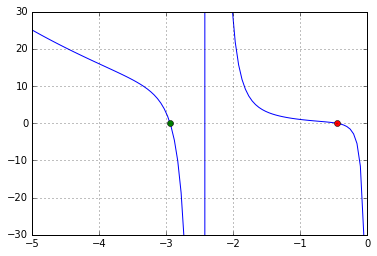

In [35]:
x=linspace(-5,0,100)
ylim([-30,30])
plot(x,fea(x),'-')
plot([-2.94267812758],[0],'o')
plot([-0.456490400596],[0],'o')
grid(True)
show()

In [29]:
print mi_newton_1(fea,d_fea,-5)

0 	-5
1 	-2.53939653437
2 	-2.59080110125
3 	-2.65726929297
4 	-2.73924312728
5 	-2.82926057257
6 	-2.90416495415
7 	-2.93797628773
8 	-2.94260667481
9 	-2.94267811104
-2.94267812758


In [39]:
print biparticion(fea,-3,-2.8)

-2.94268188477


In [34]:
print mi_newton_1(fea,d_fea,-1)

0 	-1
1 	-0.530746877804
2 	-0.442008460789
3 	-0.455854364862
4 	-0.456489188197
-0.456490400596


In [42]:
print mi_newton_1(sin,cos,pi/2-0.01)
print mi_newton_1(sin,cos,pi/2+0.01)

0 	1.56079632679
1 	-98.4358703176
2 	-96.706614104
3 	-97.5198474962
4 	-97.3886267904
-97.3893722614
0 	1.58079632679
1 	101.577462971
2 	99.8482067576
3 	100.66144015
4 	100.530219444
100.530964915


In [43]:
def num_dev(f,x,h=1e-4):
    return (f(x+h)-f(x-h))/(2.*h)

In [46]:
def mi_newton_2(func,x_ini,err=1e-8):
    n=0
    while abs(func(x_ini)) >= err:
        print n,"\t",x_ini
        raiz = x_ini - func(x_ini)/num_dev(func,x_ini)
        x_ini = raiz
        n += 1
    return raiz

In [47]:
print mi_newton_2(sin,pi/2+0.1)
print 4*pi

0 	1.67079632679
1 	11.6374407667
2 	12.9753246623
3 	12.5419364293
4 	12.5663754782
12.5663706144
12.5663706144


In [49]:
def num_dev_mejorado(f,x,h=1e-4):
    return (-f(x+2*h)+8*f(x+h)-8*f(x-h)+f(x-2*h))/(12.*h)

In [52]:
t=5*pi/4
print cos(t)
print num_dev(sin,t)
print num_dev_mejorado(sin, t)

-0.707106781187
-0.70710678001
-0.707106781189
